# Домашня робота №7

# Перетворення випадкових величин

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

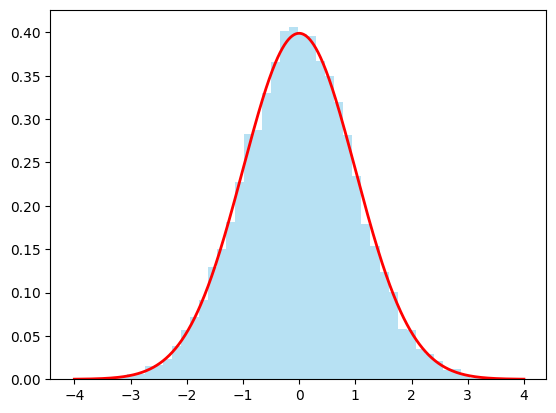

In [8]:
from scipy.stats import norm
ksi = norm(0, 1).rvs(size=10000)

x = np.linspace(-4, 4, 1000)
f_ksi = norm(0, 1).pdf(x)

plt.hist(ksi, bins=50, density=True, alpha=0.6, color='skyblue')
plt.plot(x, f_ksi, 'r-', lw=2, );

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

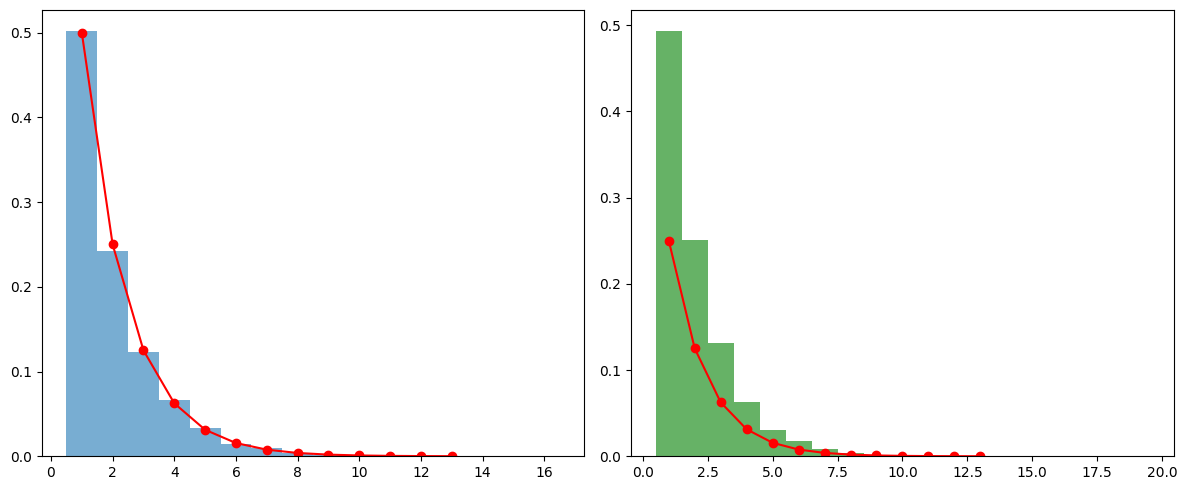

In [25]:
from scipy.stats import geom

ksi = geom(0.5).rvs(size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(ksi, bins=np.arange(1, ksi.max() + 2) - 0.5, density=True, alpha=0.6)
x_vals = np.arange(1, 14)
pmf_vals = geom.pmf(x_vals, 0.5)
ax1.plot(x_vals, pmf_vals, 'r-o')

eta = np.array([x - 1 for x in geom(0.5).rvs(size=15000) if x - 1 > 0])
eta = eta[:10000]  

x_vals_eta = np.arange(1, 14)
pmf_vals_eta = geom.pmf(x_vals_eta + 1, 0.5) 

ax2.hist(eta, bins=np.arange(1, eta.max() + 2) - 0.5, density=True, alpha=0.6, color='green')
ax2.plot(x_vals_eta, pmf_vals_eta, 'r-o')

plt.tight_layout()
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

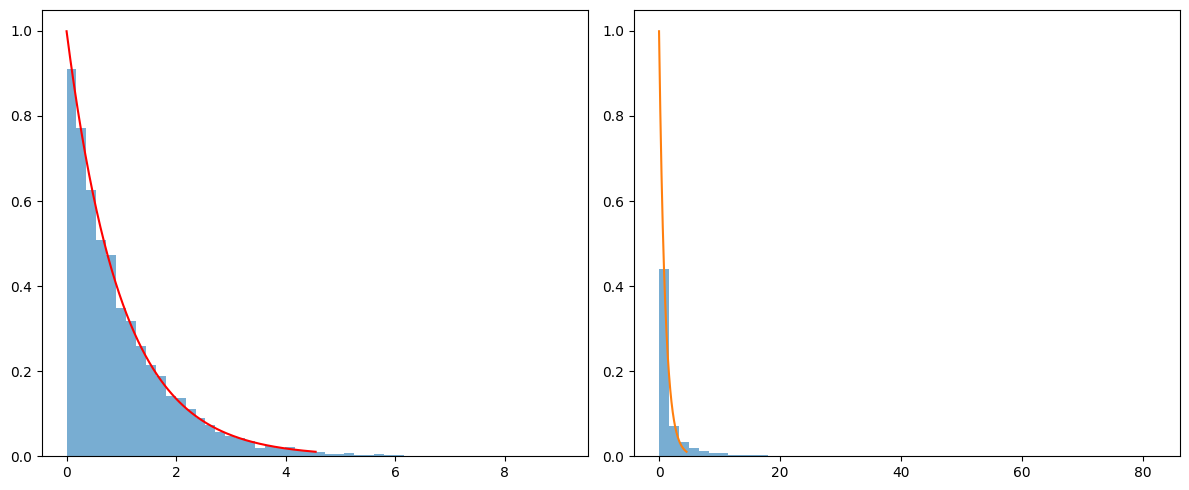

In [43]:
from scipy.stats import expon

ksi = expon(scale=1).rvs(size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(ksi, bins=50, density=True, alpha=0.6)
x_vals = np.linspace(0.001, np.percentile(ksi, 99), 200)
pdf_vals = expon(scale=1).pdf(x_vals)
ax1.plot(x_vals, pdf_vals, 'r-')

eta = ksi ** 2

def eta_pdf(y):
    return np.where(y > 0, np.exp(-np.sqrt(y)) / (2 * np.sqrt(y)), 0)

y_vals = np.linspace(0.001, np.percentile(eta, 99), 500)
ax2.hist(eta, bins=50, density=True, alpha=0.6)
# ax2.plot(y_vals, eta_pdf(y_vals), 'r-')
ax2.plot(x_vals, pdf_vals)


plt.tight_layout()
plt.show()



## 4 Одиничний квадрат

Реалізуйте випадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [44]:
from scipy.stats import uniform

x = uniform.rvs(loc=0, scale=1, size=100000)
y = uniform.rvs(loc=0, scale=1, size=100000)

ksi = np.column_stack((x, y))

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

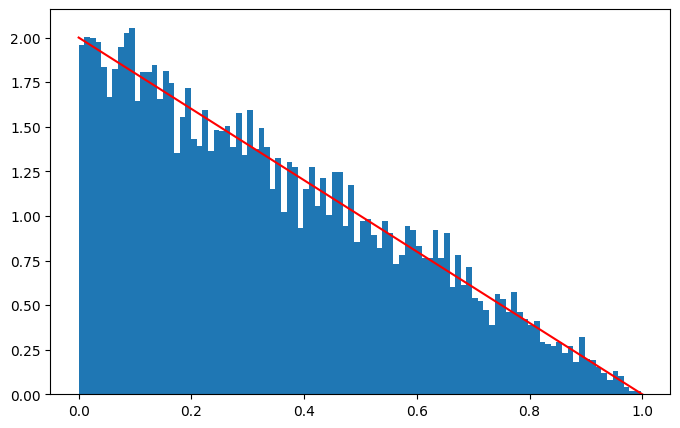

In [46]:
eta = np.abs(x - y)

plt.figure(figsize=(8, 5))
plt.hist(eta, bins=100, density=True)

z_vals = np.linspace(0, 1, 500)
pdf_vals = 2 * (1 - z_vals) 

plt.plot(z_vals, pdf_vals, 'r-')

plt.show()
